<a href="https://colab.research.google.com/github/satyambhatt5/Satyam/blob/main/MNIST_Digit_Data_Set_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn.datasets import load_digits,fetch_openml

In [3]:

#split the data into training and testing 
from sklearn.model_selection import train_test_split

In [4]:
#find the metrics of the data 
from sklearn.metrics import accuracy_score,confusion_matrix


In [5]:
#loading the data load_digit package it should have images and data set  

digits =load_digits()

In [6]:
#hence there is two form   1- data ,2- Target 

print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


# PRINT TOP  FIVE RECORD FROM THE DIGIT DATA SET 

def plot_images(data,target,img_shape=(8,8)):
  
  plt.figure(figsize=(20,5))
  
  for index,(image,label) in enumerate(zip(data[:5],target[:5])): 
    #Enter the inside the data into the target data set or manage image and label enumrate means show the data 
    
    
    plt.subplot(1,5,index+1)
    #building the image with new image  cmap =plt.cm.gray will help  to find the accuracy   
    
    
    plt.imshow(np.reshape(image,img_shape),cmap=plt.cm.gray)
    plt.title("training %i\n" %label,frontsize=20)
    

In [7]:
def plot_images(data,target,img_shape=(8,8)):
    plt.figure(figsize=(20,5))
    for index,(image,label) in enumerate(zip(data[:5],target[:5])):
        plt.subplot(1,5,index+1)
        plt.imshow(np.reshape(image,img_shape),cmap=plt.cm.gray)
        plt.title("Training %i\n" %label,fontsize=20)

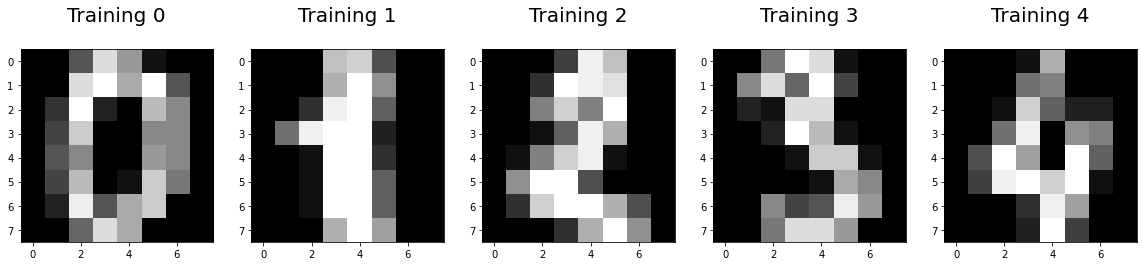

In [8]:
plot_images(digits.data,digits.target)

In [9]:
#training the data with machine learning  model   

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(digits.data,digits.target,test_size=.25,random_state=100)


In [10]:
#buiding the logistic regression   system   
from sklearn.linear_model import LogisticRegression

In [11]:
lr= LogisticRegression()

In [12]:
#model had learn the data sucessfully  
lr.fit(x_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
#now we predict the data while using x_test data 

y_pred=lr.predict(x_test)

In [14]:
#now find the accuracy score of the model by trained model  
score=accuracy_score(y_test,y_pred)
score

0.9688888888888889

In [15]:
#now find the confusion  matrix  

cm=confusion_matrix(y_test,y_pred)

In [16]:
cm

array([[49,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 51,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0, 52,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0, 42,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 46,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 42,  0,  1],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 38,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  1,  0, 43]])

In [17]:
def get_misclassified_index(y_pred,y_test):
  misclassification=[]
  for index,(predicted,actual) in enumerate(zip(y_pred,y_test)):
    if predicted!=actual:
      misclassification.append(index)
      return misclassification

In [18]:
misclassification=get_misclassified_index(y_pred,y_test)


In [19]:
def plot_misclassifications(misclassification,img_shape=(8,8)):
    plt.figure(figsize=(20,4))
    for index,wrong in enumerate(misclassification[0:5]):
        plt.subplot(1,5,index+1)
        plt.imshow(np.reshape(x_test[wrong],img_shape),cmap=plt.cm.gray)
        plt.title("Predicted:{} Actual:{}".format(y_pred[wrong],y_test[wrong]))

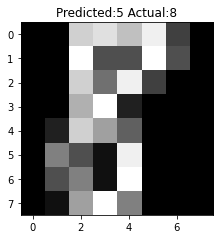

In [20]:
plot_misclassifications(misclassification)